In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fetal_health.csv')
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [3]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
# Clean data
data.dropna(inplace=True)   # Could be replaced with median
data.drop_duplicates(inplace=True)

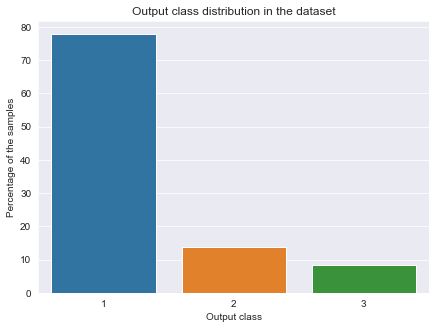

In [5]:
# Data visualization
percentages = (data['fetal_health'].astype('int32').value_counts(normalize=True) * 100 )
x_p, y_p = percentages.index, percentages.values

plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
plt.title('Output class distribution in the dataset')
plt.xlabel('Output class')
plt.ylabel('Percentage of the samples')

sns.barplot(x=x_p, y=y_p)
plt.show()

# Dataset looks like highly imbalanced with class 1 dominating at close to 80% of the total samples.

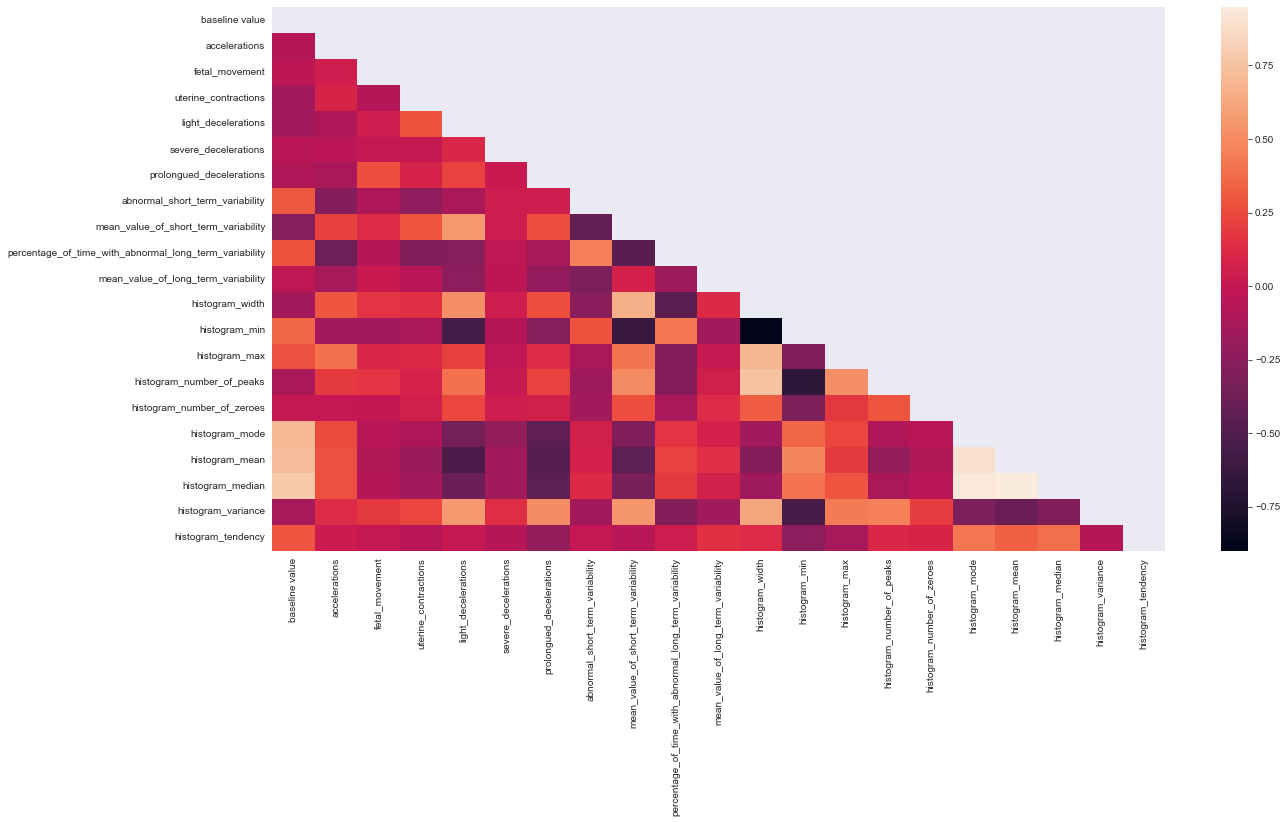

In [6]:
corr = data.loc[:, ~data.columns.isin(['fetal_health'])].corr()

# To get only the lower triangle we apply a mask of upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=mask, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [7]:
!pip install imbalanced-learn

You should consider upgrading via the 'C:\Users\nikhi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
def print_counts(y):
    """
    Prints the number of samples in each class
    :param y:
    :return:
    """
    unique, counts = np.unique(y, return_counts=True)
    for i in range(len(counts)):
        print('Output Class ', unique[i], ' count is ', counts[i])

In [15]:
# Use SMOTE technique to generate samples for the minority classes
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

x_raw, y_raw = data.loc[:, ~data.columns.isin(['fetal_health'])], data['fetal_health']

# Print sample counts before SMOTE
print('Before oversampling:-')
print_counts(y_raw)

over_sampler = SMOTE()
x_raw, y_raw = over_sampler.fit_resample(x_raw, y_raw)

# Print sample counts after SMOTE
print('\nAfter oversampling:-')
print_counts(y_raw)

# # Using PCA and reducing dimensionality
# pca = PCA(n_components=10)
# x_raw = pca.fit_transform(x_raw)  # Commenting since there was no improvement observed

# Perform scaling
scaler = StandardScaler()
x_raw = scaler.fit_transform(x_raw)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw)
print('\nShapes of train and test sets are', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Before oversampling:-
Output Class  1.0  count is  1646
Output Class  2.0  count is  292
Output Class  3.0  count is  175

After oversampling:-
Output Class  1.0  count is  1646
Output Class  2.0  count is  1646
Output Class  3.0  count is  1646

Shapes of train and test sets are (3703, 21) (1235, 21) (3703,) (1235,)


In [16]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# This level of high accuracy could be attributed to the high imbalance we can observe in the given dataset.

0.9384615384615385
              precision    recall  f1-score   support

         1.0       0.99      0.88      0.93       415
         2.0       0.87      0.96      0.91       393
         3.0       0.96      0.98      0.97       427

    accuracy                           0.94      1235
   macro avg       0.94      0.94      0.94      1235
weighted avg       0.94      0.94      0.94      1235

[[364  48   3]
 [  3 377  13]
 [  2   7 418]]


In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9757085020242915
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       415
         2.0       0.95      0.98      0.97       393
         3.0       0.99      0.99      0.99       427

    accuracy                           0.98      1235
   macro avg       0.98      0.98      0.98      1235
weighted avg       0.98      0.98      0.98      1235

[[396  18   1]
 [  3 385   5]
 [  2   1 424]]


In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9578947368421052
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       415
         2.0       0.91      0.97      0.94       393
         3.0       0.98      0.98      0.98       427

    accuracy                           0.96      1235
   macro avg       0.96      0.96      0.96      1235
weighted avg       0.96      0.96      0.96      1235

[[382  31   2]
 [  6 381   6]
 [  2   5 420]]


In [20]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7522267206477733
              precision    recall  f1-score   support

         1.0       0.87      0.81      0.84       415
         2.0       0.59      0.89      0.71       393
         3.0       0.93      0.57      0.71       427

    accuracy                           0.75      1235
   macro avg       0.80      0.76      0.75      1235
weighted avg       0.80      0.75      0.75      1235

[[335  73   7]
 [ 30 351  12]
 [ 18 166 243]]


In [21]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9668016194331984
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       415
         2.0       0.93      0.97      0.95       393
         3.0       0.99      0.99      0.99       427

    accuracy                           0.97      1235
   macro avg       0.97      0.97      0.97      1235
weighted avg       0.97      0.97      0.97      1235

[[389  24   2]
 [  8 383   2]
 [  2   3 422]]


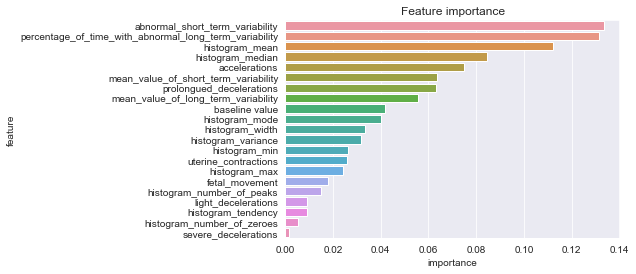

In [37]:
# Create a dataframe with the features and their importance
feature_names = data.columns[~data.columns.isin(['fetal_health'])].values
feature_importance = pd.DataFrame({'feature': feature_names,
                                   'importance': rf_classifier.feature_importances_})
# Sort the dataframe by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)
# Plot the feature importance
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance')
plt.show()